# Assignment

1. Tambahkan convolution layer berikut untuk data yang sudah dilakukan data augmentation:

    - Convolution layer dengan 32 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 64 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 128 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2

  Bandingkan hasil accuracy yang didapat dengan ketika training dilakukan dengan model baseline! Jelaskan kesimpulannya! Gunakan nilai epoch 75. Lalu bandingkan juga plot epoch terhadap lossnya!

2. Tentukan arsitektur CNN serta hyperparameter tuning bagi mendapatkan hasil terbaik untuk dataset ini!

In [ ]:
zip_path = '/content/drive/My\ Drive/Bootcamp\ ML2020/dataset/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

# !rm /content/cats-dogs.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 55s 548ms/step - loss: 0.7617 - accuracy: 0.5298 - val_loss: 0.6896 - val_accuracy: 0.5018
Epoch 2/75
100/100 [==============================] - 52s 523ms/step - loss: 0.6770 - accuracy: 0.5750 - val_loss: 0.6649 - val_accuracy: 0.5719
Epoch 3/75
100/100 [==============================] - 52s 520ms/step - loss: 0.6538 - accuracy: 0.6095 - val_loss: 0.6386 - val_accuracy: 0.6292
Epoch 4/75
100/100 [==============================] - 51s 512ms/step - loss: 0.6331 - accuracy: 0.6306 - val_loss: 0.6158 - val_accuracy: 0.6679
Epoch 5/75
100/100 [==============================] - 51s 515ms/step - loss: 0.6241 - accuracy: 0.6383 - val_loss: 0.6306 - val_accuracy: 0.6461
Epoch 6/75
100/100 [==============================] - 51s 513ms/step - loss: 0.6509 - accuracy: 0.5816 - val_loss: 0.6709 - val_accuracy: 0.6146
Epoch 7/75
100/100 [==============================] - 

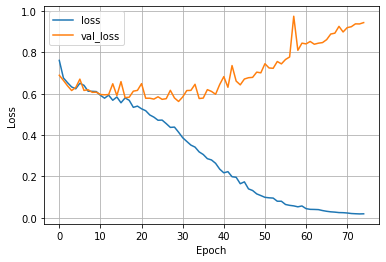

In [ ]:
plot_loss(history_base_model)

**Kesimpulan:** Pada **Augmentation** 3 Layer, Saya Mendapatkan nilai akurasi terbaik pada epoch 73, dengan nilai akurasi **84%** dan val_loss **35%**, ini lebih baik jika dibandingkan dengan **Baseline** yang mana akurasi yang didapatkan adalah **71%** dan val_loss **56%**